Matplotlib is building the font cache; this may take a moment.


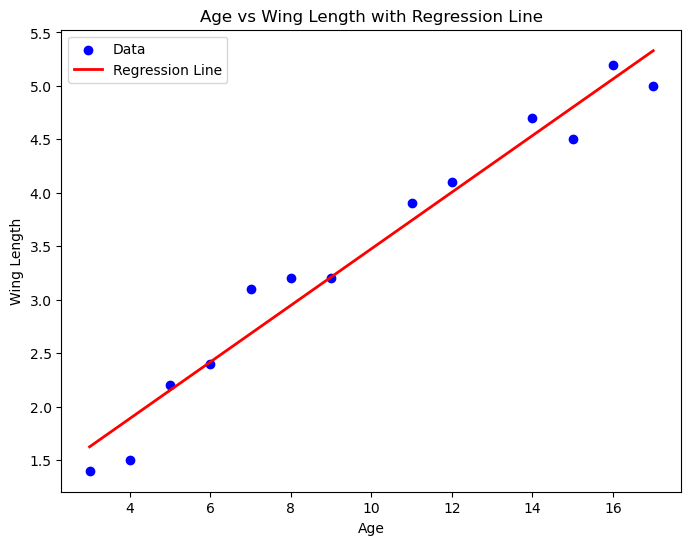

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]).reshape(-1, 1)
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Fit regression model
model = LinearRegression()
model.fit(age, wing_length)

# Predict values for regression line
age_range = np.linspace(age.min(), age.max(), 100).reshape(-1, 1)
wing_pred = model.predict(age_range)

# Plot scatter and regression line
plt.figure(figsize=(8, 6))
plt.scatter(age, wing_length, color="blue", label="Data")
plt.plot(age_range, wing_pred, color="red", linewidth=2, label="Regression Line")

plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Age vs Wing Length with Regression Line")
plt.legend()
plt.show()

In [3]:
# Fit OLS with intercept
import statsmodels.api as sm
from scipy import stats
X = sm.add_constant(age)       
model = sm.OLS(wing_length, X).fit()

# Extract slope info
intercept = model.params[0]
slope = model.params[1]
slope_se = model.bse[1]
t_stat = model.tvalues[1]
p_value = model.pvalues[1]

# Print results
print("Regression (Wing Length ~ Age)")
print(f"  Intercept = {intercept:.4f}")
print(f"  Slope (b) = {slope:.4f}")
print(f"  Std. error of slope = {slope_se:.4f}")
print(f"  t-statistic for slope = {t_stat:.4f}")
print(f"  p-value for slope = {p_value:.6f}")

# Decision for H0: b = 0 (two-sided) at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print(f"\nDecision: Reject H0 (p = {p_value:.6f} < {alpha}) — slope is significantly different from 0.")
else:
    print(f"\nDecision: Fail to reject H0 (p = {p_value:.6f} >= {alpha}) — insufficient evidence that slope differs from 0.")

# 

Regression (Wing Length ~ Age)
  Intercept = 0.8296
  Slope (b) = 0.2647
  Std. error of slope = 0.0156
  t-statistic for slope = 17.0118
  p-value for slope = 0.000000

Decision: Reject H0 (p = 0.000000 < 0.05) — slope is significantly different from 0.


Regression results (Wing Length ~ Age)
  Intercept = 0.8296
  Slope = 0.2647
  95% CI for slope = [0.23043927955854424, 0.2989289617618882]
  R² (coefficient of determination) = 0.9634
  Pearson’s r = 0.9815, p = 0.000000


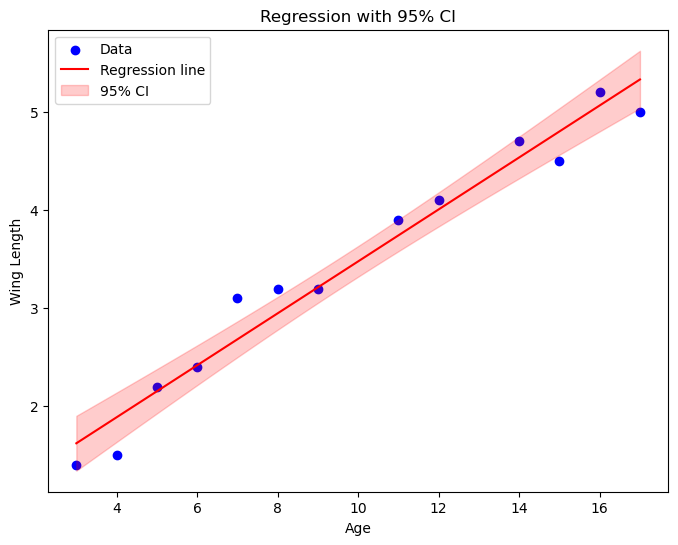

In [9]:
# Extract slope, intercept, and CI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
intercept, slope = model.params
conf_int = model.conf_int(alpha=0.05)  # shape (2,2): rows = coefficients, cols = [lower, upper]
slope_ci = conf_int[1].tolist() 

# R-squared (coefficient of determination)
r_squared = model.rsquared

# Pearson’s r
pearson_r, pearson_p = stats.pearsonr(age.flatten(), wing_length)

# Print results
print("Regression results (Wing Length ~ Age)")
print(f"  Intercept = {intercept:.4f}")
print(f"  Slope = {slope:.4f}")
print(f"  95% CI for slope = {slope_ci}")
print(f"  R² (coefficient of determination) = {r_squared:.4f}")
print(f"  Pearson’s r = {pearson_r:.4f}, p = {pearson_p:.6f}")

# Plot regression line with slope confidence band
age_range = np.linspace(age.min(), age.max(), 100)
pred = model.get_prediction(sm.add_constant(age_range))
pred_summary = pred.summary_frame(alpha=0.05)

plt.figure(figsize=(8, 6))
plt.scatter(age, wing_length, color="blue", label="Data")
plt.plot(age_range, pred_summary["mean"], color="red", label="Regression line")
plt.fill_between(age_range, pred_summary["mean_ci_lower"], pred_summary["mean_ci_upper"],
                 color="red", alpha=0.2, label="95% CI")

plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression with 95% CI")
plt.legend()
plt.show()